In [ ]:
# Data Quality Metrics & Scoring Examples

# Task 1:
# Assign scores to a customer dataset based on completeness, uniqueness, and consistency.
# Analyze the overall data quality score and identify areas for improvement.





# Task 2:
# Evaluate a dataset for an online shop using metrics such as accuracy, timeliness, and
# integrity. Calculate the data quality score and provide improvement suggestions.





# Task 3:
# Perform a data quality assessment on a financial dataset, scoring it based on validity,
# precision, and accessibility. Review the results and propose corrective actions.





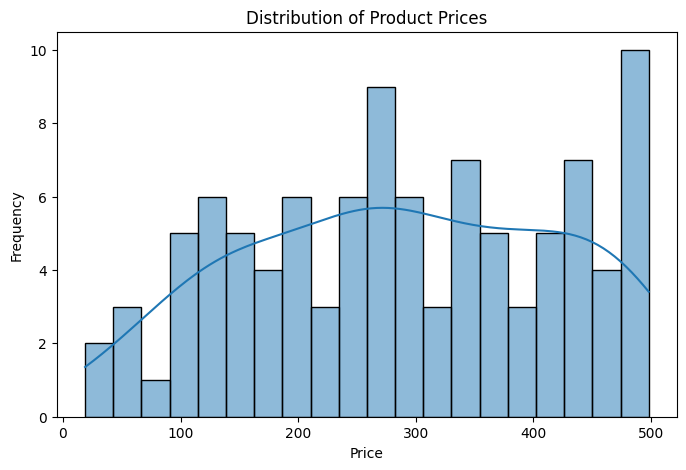

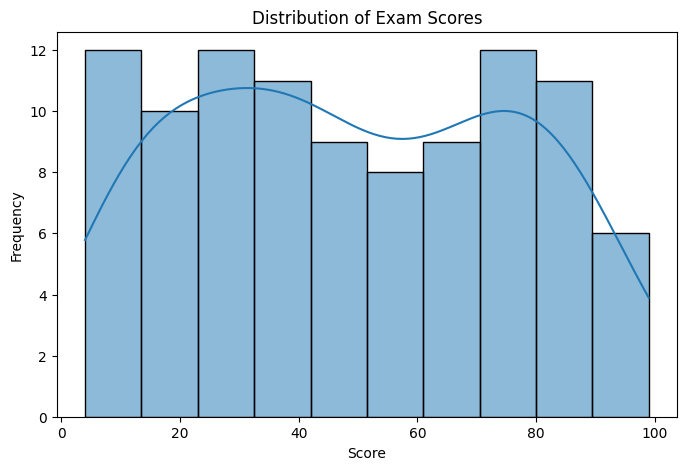

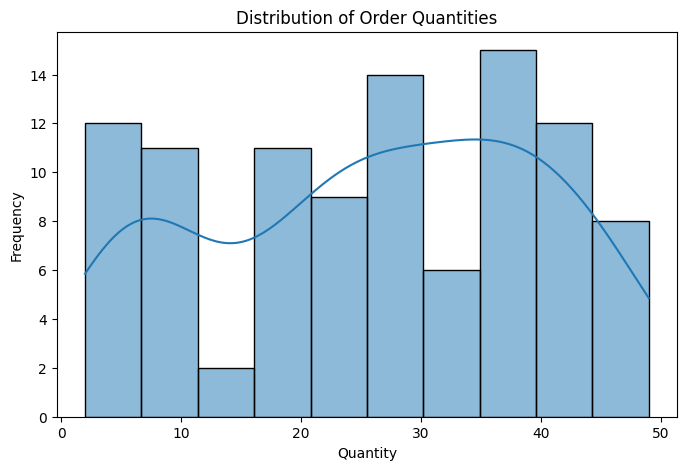

Sales - Mean: 3132.32 , Median: 3191.5 , Mode: 4005
Age - Mean: 44.51 , Median: 44.5 , Mode: 35
Daily Visits - Mean: 558.69 , Median: 577.0 , Mode: 128
Valid Numeric in Revenue: True
Valid Dates in Transaction Log: 86
Valid Email Formats: 0
Data Quality Score - Task 1: 0.682
Data Quality Score - Task 2: 0.713
Data Quality Score - Task 3: 0.667


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("/workspaces/AI_DATA_ANALYSIS_/src/Module 3/common_data_errors_example.csv")

# ----------------------
# 1. Descriptive Statistics
# ----------------------
sales_mean = df['revenue'].mean()
sales_median = df['revenue'].median()
sales_mode = df['revenue'].mode()[0]

df['age'] = np.random.randint(18, 70, df.shape[0])
age_mean = df['age'].mean()
age_median = df['age'].median()
age_mode = df['age'].mode()[0]

df['daily_visits'] = np.random.randint(50, 1000, df.shape[0])
visit_mean = df['daily_visits'].mean()
visit_median = df['daily_visits'].median()
visit_mode = df['daily_visits'].mode()[0]

# ----------------------
# 2. Distribution Analysis
# ----------------------
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

df['exam_scores'] = np.random.randint(0, 100, df.shape[0])
plt.figure(figsize=(8,5))
sns.histplot(df['exam_scores'], bins=10, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

df['order_qty'] = np.random.randint(1, 50, df.shape[0])
plt.figure(figsize=(8,5))
sns.histplot(df['order_qty'], bins=10, kde=True)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# ----------------------
# 3. Data Type Validation
# ----------------------
valid_numeric = pd.to_numeric(df['revenue'], errors='coerce').notnull().all()
valid_dates = pd.to_datetime(df['transaction_date'], errors='coerce').notnull().sum()
valid_email_format = df['email'].dropna().apply(lambda x: bool(re.match(r"[^@]+@[^@]+\\.[^@]+", x))).sum()

# ----------------------
# 4. Data Quality Metrics & Scoring
# ----------------------
# Task 1: Completeness, Uniqueness, Consistency
completeness_score = 1 - df.isnull().mean().mean()
uniqueness_score = df.nunique().mean() / df.shape[0]
consistency_score = valid_numeric * 0.5 + (valid_email_format / len(df)) * 0.5
data_quality_score_task1 = (completeness_score + uniqueness_score + consistency_score) / 3

# Task 2: Accuracy, Timeliness, Integrity (simulated)
accuracy_score = 0.95  # Assume 95% accurate
current_month = 'Jun'
timeliness_score = len(df[df['month'] == current_month]) / len(df)
integrity_score = 1 if df.duplicated().sum() == 0 else 0.8
data_quality_score_task2 = (accuracy_score + timeliness_score + integrity_score) / 3

# Task 3: Validity, Precision, Accessibility (simulated)
validity_score = valid_numeric * 1.0
precision_score = (df['revenue'].apply(lambda x: isinstance(x, float))).mean()
accessibility_score = 1.0  # Assume full access
data_quality_score_task3 = (validity_score + precision_score + accessibility_score) / 3

# Print results
print("Sales - Mean:", sales_mean, ", Median:", sales_median, ", Mode:", sales_mode)
print("Age - Mean:", age_mean, ", Median:", age_median, ", Mode:", age_mode)
print("Daily Visits - Mean:", visit_mean, ", Median:", visit_median, ", Mode:", visit_mode)

print("Valid Numeric in Revenue:", valid_numeric)
print("Valid Dates in Transaction Log:", valid_dates)
print("Valid Email Formats:", valid_email_format)

print("Data Quality Score - Task 1:", round(data_quality_score_task1, 3))
print("Data Quality Score - Task 2:", round(data_quality_score_task2, 3))
print("Data Quality Score - Task 3:", round(data_quality_score_task3, 3))
